In [1]:
%matplotlib inline

In [3]:
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.assets._assets import Future
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('NYSE')
bundle = 'futures'
bundle_data = bundles.load(bundle)

data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

fut = bundle_data.asset_finder.retrieve_futures_contracts([0])[0]

end_dt = pd.Timestamp('2018-01-05', tz='UTC', offset='C')
start_dt = pd.Timestamp('2018-01-02', tz='UTC', offset='C')
    
end_loc = trading_calendar.closes.index.get_loc(end_dt)

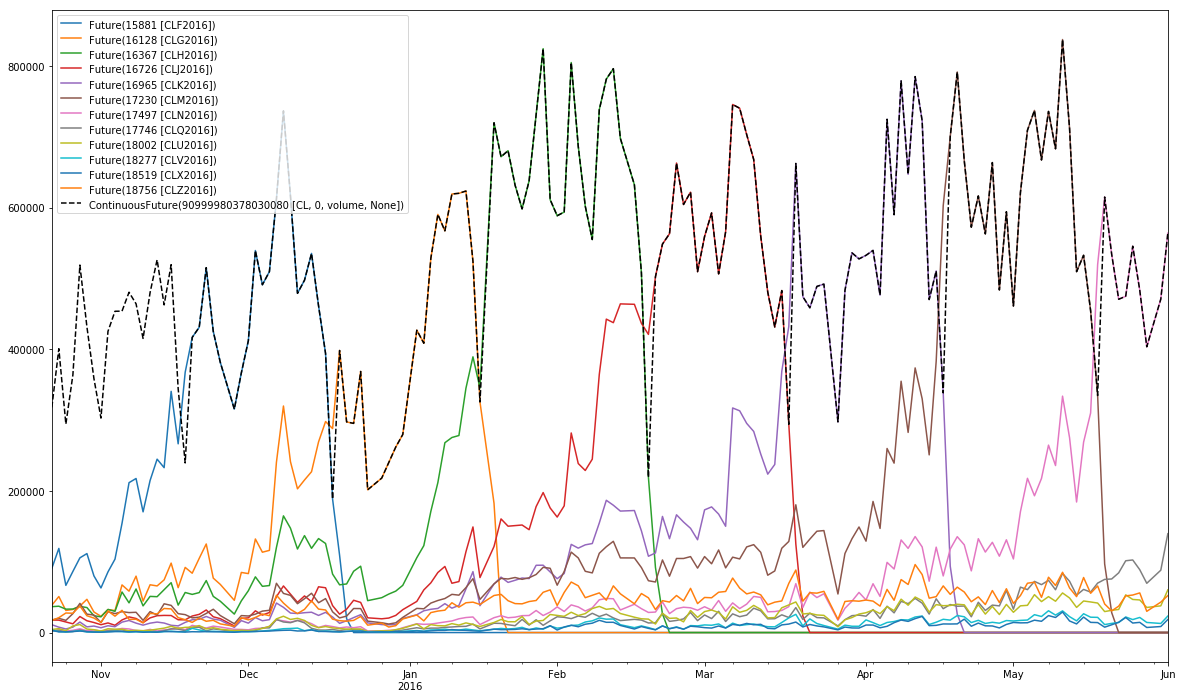

In [4]:
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data.get_history_window
symbol = 'CL'

continuous_cl = continuous_future(symbol, offset=0, roll_style='volume', adjustment=None)

cl_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x) 
    for x
    in ['{}{}{}'.format(symbol, l, y) for l in 'FGHJKMNQUVXZ' for y in ['2016',]] #'2017'] ]
]

cl_contracts.append(continuous_cl)

start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-06-01', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
cl_consecutive_contract_volume = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

cl_consecutive_contract_volume.plot(figsize=(20,12), style={continuous_cl: 'k--'});

In [4]:
cl_consecutive_contract_volume['2016-03-01':'2016-03-31']

,Future(15881 [CLF2016]),Future(16128 [CLG2016]),Future(16367 [CLH2016]),Future(16726 [CLJ2016]),Future(16965 [CLK2016]),Future(17230 [CLM2016]),Future(17497 [CLN2016]),Future(17746 [CLQ2016]),Future(18002 [CLU2016]),Future(18277 [CLV2016]),Future(18519 [CLX2016]),Future(18756 [CLZ2016]),"ContinuousFuture(90999980378030080 [CL, 0, volume, None])"
2016-03-01 00:00:00+00:00,0.0,0.0,0.0,559124.0,173183.0,107256.0,36425.0,24817.0,29612.0,10769.0,6923.0,49527.0,559124.0
2016-03-02 00:00:00+00:00,0.0,0.0,0.0,592382.0,177360.0,97096.0,31754.0,19728.0,31802.0,10297.0,6313.0,49092.0,592382.0
2016-03-03 00:00:00+00:00,0.0,0.0,0.0,506313.0,167236.0,116576.0,45234.0,30043.0,28302.0,12158.0,9238.0,56907.0,506313.0
2016-03-04 00:00:00+00:00,0.0,0.0,0.0,565803.0,150028.0,91353.0,29953.0,15578.0,19112.0,6589.0,6395.0,57988.0,565803.0
2016-03-07 00:00:00+00:00,0.0,0.0,0.0,745455.0,317049.0,106399.0,41856.0,26359.0,36360.0,13273.0,11481.0,76915.0,745455.0
2016-03-08 00:00:00+00:00,0.0,0.0,0.0,740152.0,313021.0,103926.0,33850.0,22399.0,28604.0,9937.0,10209.0,62712.0,740152.0
2016-03-09 00:00:00+00:00,0.0,0.0,0.0,702916.0,295267.0,120899.0,40139.0,24633.0,31330.0,11230.0,12906.0,54573.0,702916.0
2016-03-10 00:00:00+00:00,0.0,0.0,0.0,667739.0,283890.0,124081.0,50975.0,34366.0,38320.0,12055.0,10967.0,57169.0,667739.0
2016-03-11 00:00:00+00:00,0.0,0.0,0.0,559514.0,252007.0,113255.0,49643.0,30647.0,32737.0,9751.0,11630.0,53248.0,559514.0
2016-03-14 00:00:00+00:00,0.0,0.0,0.0,480600.0,223631.0,80957.0,29346.0,19318.0,20759.0,8288.0,5971.0,39155.0,480600.0


In [7]:
es = bundle_data.asset_finder.lookup_future_symbol('ESZ2018')

In [8]:
es.expiration_date

Timestamp('2018-12-21 00:00:00+0000', tz='UTC')

In [9]:
clf17_sid = bundle_data.asset_finder.lookup_future_symbol('CLF2017').sid
start_dt = pd.Timestamp('2017-10-1', tz='UTC', offset='C')
cl = continuous_future('CL', offset=0, roll_style='calendar', adjustment='mul')
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(19067 [CLF2017]),
 Future(19303 [CLG2017]),
 Future(19518 [CLH2017]),
 Future(19779 [CLJ2017]),
 Future(20006 [CLK2017]),
 Future(20237 [CLM2017]),
 Future(20482 [CLN2017]),
 Future(20721 [CLQ2017]),
 Future(20942 [CLU2017]),
 Future(21206 [CLV2017]),
 Future(21458 [CLX2017]),
 Future(21675 [CLZ2017]),
 Future(25088 [CLF2018]),
 Future(25309 [CLG2018]),
 Future(25510 [CLH2018]),
 Future(25752 [CLJ2018]),
 Future(25960 [CLK2018]),
 Future(26176 [CLM2018]),
 Future(26406 [CLN2018]),
 Future(26623 [CLQ2018]),
 Future(26831 [CLU2018]),
 Future(27063 [CLV2018]),
 Future(27391 [CLX2018]),
 Future(27639 [CLZ2018]),
 Future(27872 [CLF2019]),
 Future(28057 [CLG2019]),
 Future(28239 [CLH2019]),
 Future(28452 [CLJ2019]),
 Future(28626 [CLK2019]),
 Future(28808 [CLM2019]),
 Future(29004 [CLN2019]),
 Future(29179 [CLQ2019]),
 Future(29354 [CLU2019]),
 Future(29552 [CLV2019]),
 Future(29717 [CLX2019]),
 Future(29881 [CLZ2019]),
 Future(30064 [CLF2020]),
 Future(30202 [CLG2020]),
 Future(3034

In [10]:
all_chain[1].to_dict()

{'asset_name': 'Crude Oil Futures, February 2017 (CLG2017)',
 'auto_close_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19303,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLG2017',
 'tick_size': 0.01}

In [11]:
c = all_chain[-1]

In [12]:
c.symbol

'CLZ2025'

In [13]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field= 'price',
    data_frequency='daily'
)

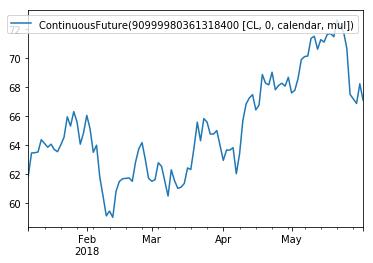

In [14]:
cf.plot()

In [15]:
cl = continuous_future('CL', offset=0, roll_style='volume', adjustment=None)

In [16]:
cl.to_dict()

{'end_date': Timestamp('2018-10-30 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'offset': 0,
 'roll_style': 'volume',
 'root_symbol': 'CL',
 'sid': 90999980378030080,
 'start_date': Timestamp('1983-03-30 00:00:00+0000', tz='UTC')}

In [17]:
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(19067 [CLF2017]),
 Future(19303 [CLG2017]),
 Future(19518 [CLH2017]),
 Future(19779 [CLJ2017]),
 Future(20006 [CLK2017]),
 Future(20237 [CLM2017]),
 Future(20482 [CLN2017]),
 Future(20721 [CLQ2017]),
 Future(20942 [CLU2017]),
 Future(21206 [CLV2017]),
 Future(21458 [CLX2017]),
 Future(21675 [CLZ2017]),
 Future(25088 [CLF2018]),
 Future(25309 [CLG2018]),
 Future(25510 [CLH2018]),
 Future(25752 [CLJ2018]),
 Future(25960 [CLK2018]),
 Future(26176 [CLM2018]),
 Future(26406 [CLN2018]),
 Future(26623 [CLQ2018]),
 Future(26831 [CLU2018]),
 Future(27063 [CLV2018]),
 Future(27391 [CLX2018]),
 Future(27639 [CLZ2018]),
 Future(27872 [CLF2019]),
 Future(28057 [CLG2019]),
 Future(28239 [CLH2019]),
 Future(28452 [CLJ2019]),
 Future(28626 [CLK2019]),
 Future(28808 [CLM2019]),
 Future(29004 [CLN2019]),
 Future(29179 [CLQ2019]),
 Future(29354 [CLU2019]),
 Future(29552 [CLV2019]),
 Future(29717 [CLX2019]),
 Future(29881 [CLZ2019]),
 Future(30064 [CLF2020]),
 Future(30202 [CLG2020]),
 Future(3034

In [18]:
all_chain[2].to_dict()

{'asset_name': 'Crude Oil Futures, March 2017 (CLH2017)',
 'auto_close_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19518,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLH2017',
 'tick_size': 0.01}

In [19]:
all_chain[3].to_dict()

{'asset_name': 'Crude Oil Futures, April 2017 (CLJ2017)',
 'auto_close_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19779,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLJ2017',
 'tick_size': 0.01}

In [20]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field='sid',
    data_frequency='daily'
)

In [21]:
cf.columns=['contract']

In [22]:
contracts = cf['contract'].apply(lambda x: bundle_data.asset_finder.retrieve_asset(x))

In [23]:
contracts

2018-01-08 00:00:00+00:00    Future(25309 [CLG2018])
2018-01-09 00:00:00+00:00    Future(25309 [CLG2018])
2018-01-10 00:00:00+00:00    Future(25309 [CLG2018])
2018-01-11 00:00:00+00:00    Future(25309 [CLG2018])
2018-01-12 00:00:00+00:00    Future(25309 [CLG2018])
2018-01-16 00:00:00+00:00    Future(25309 [CLG2018])
2018-01-17 00:00:00+00:00    Future(25309 [CLG2018])
2018-01-18 00:00:00+00:00    Future(25309 [CLG2018])
2018-01-19 00:00:00+00:00    Future(25510 [CLH2018])
2018-01-22 00:00:00+00:00    Future(25510 [CLH2018])
2018-01-23 00:00:00+00:00    Future(25510 [CLH2018])
2018-01-24 00:00:00+00:00    Future(25510 [CLH2018])
2018-01-25 00:00:00+00:00    Future(25510 [CLH2018])
2018-01-26 00:00:00+00:00    Future(25510 [CLH2018])
2018-01-29 00:00:00+00:00    Future(25510 [CLH2018])
2018-01-30 00:00:00+00:00    Future(25510 [CLH2018])
2018-01-31 00:00:00+00:00    Future(25510 [CLH2018])
2018-02-01 00:00:00+00:00    Future(25510 [CLH2018])
2018-02-02 00:00:00+00:00    Future(25510 [CLH

In [24]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

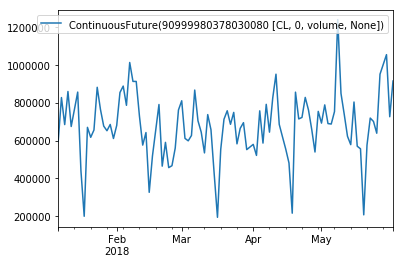

In [26]:
cf.plot();